In [1]:
from math import log

import re
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [2]:
out = "../data"
rows = []

for path in os.listdir(out):
    if path.endswith(".ser"):
        continue
    m = re.match(r"^([a-z]+)_ninit_(\d+)_n_(\d+)_c_(\d+)_s_(\d+)_l_(\d+.\d+)_ne_(\d+)_rep_(\d+)", path)
    if m is not None:
        algo, n_init, n, c, s, l, ne, rep = m.groups()
    else:
        raise

    path = os.path.join(out, path)
    df = pd.read_csv(path, dtype=np.float64)

    nz = len(l) * 500 / 10000
    
    row = {
        "algo": algo,
        "n_init": int(n_init),
        "n": int(n),
        "c": int(c),
        "s": int(s),
        "l": float(l),
        "nz": int(nz),
        "ne": int(ne),
        "rep": int(rep),
        "df": df
    }
    rows.append(row)

In [9]:
# truncate to lowest number of iterations
truncate = False
if truncate:
    lowest_it = min(len(x['df']) for x in rows)
    for row in rows:
        row['df'] = row['df'][:lowest_it]

        
lowest_it = {}
for n in [200, 400, 800, 1600]:
    lowest_it[n] = min([len(x['df']) for x in rows if x['n'] == n])

for row in rows:
    row['df'] = row['df'][:lowest_it[row['n']]]



In [ ]:

for tail in [0.1, 0.2, 0.3, 0.4]:
    for row in rows:
        if row['l'] == tail:
            xs = np.linspace(0, len(row['df']), len(row['df']))
            ys = row['df']
            print(len(ys))
            c = 'r' if row['algo'] == "bernoulli" else 'g'
            plt.plot(xs, ys, c=c, label=row['algo'])

    title = "log_mc_estimate_vs_nz_(n={}_c={}_s={}_l={}_ne={})".format(2500, 4, 5, tail, 10000)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (15,15)
    plt.yscale('log')
    plt.ylabel("mc estimate")
    plt.xlabel("nz")
    plt.legend()
    plt.show()

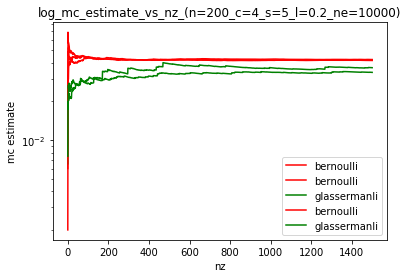

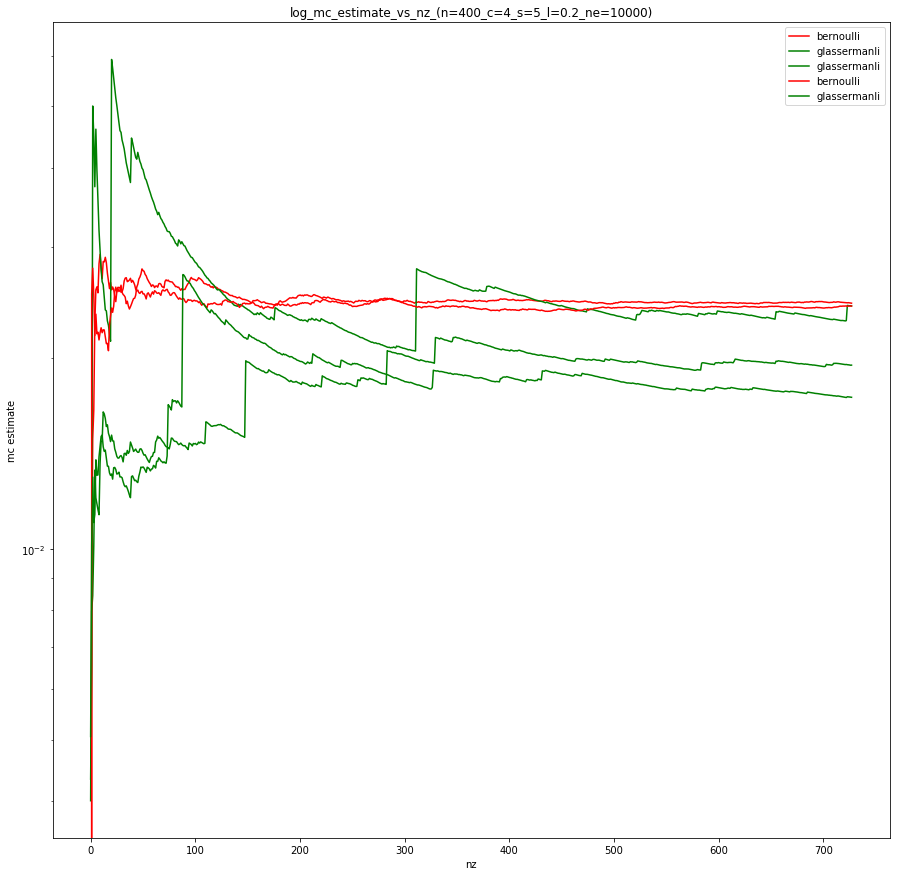

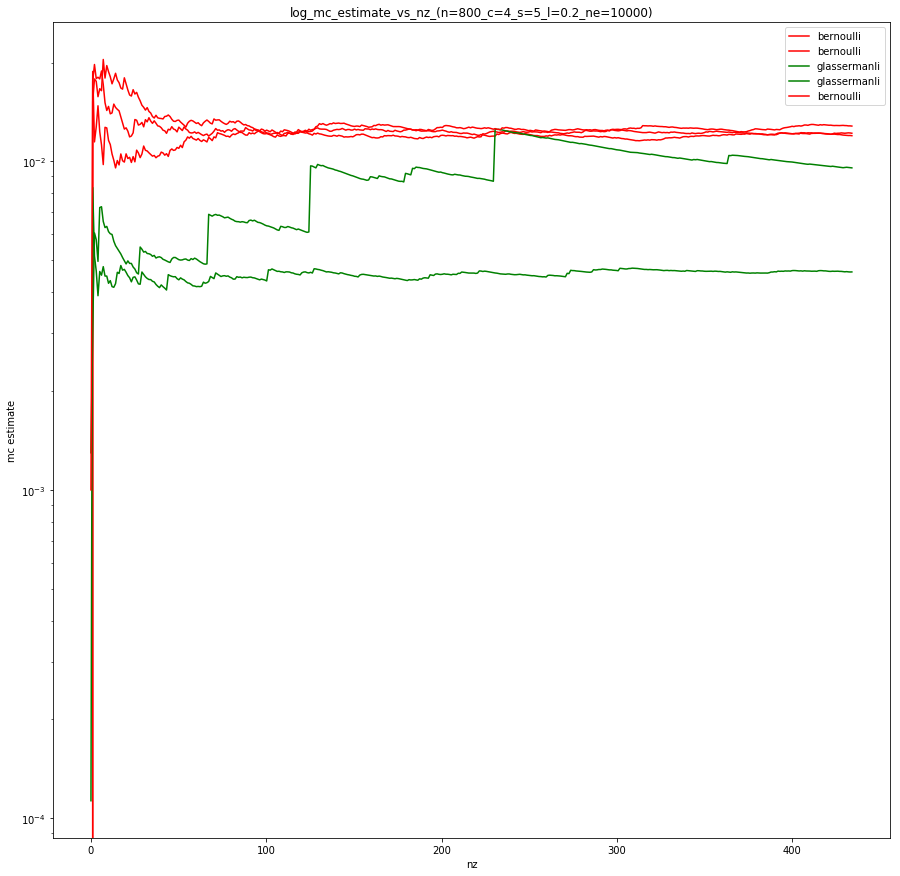

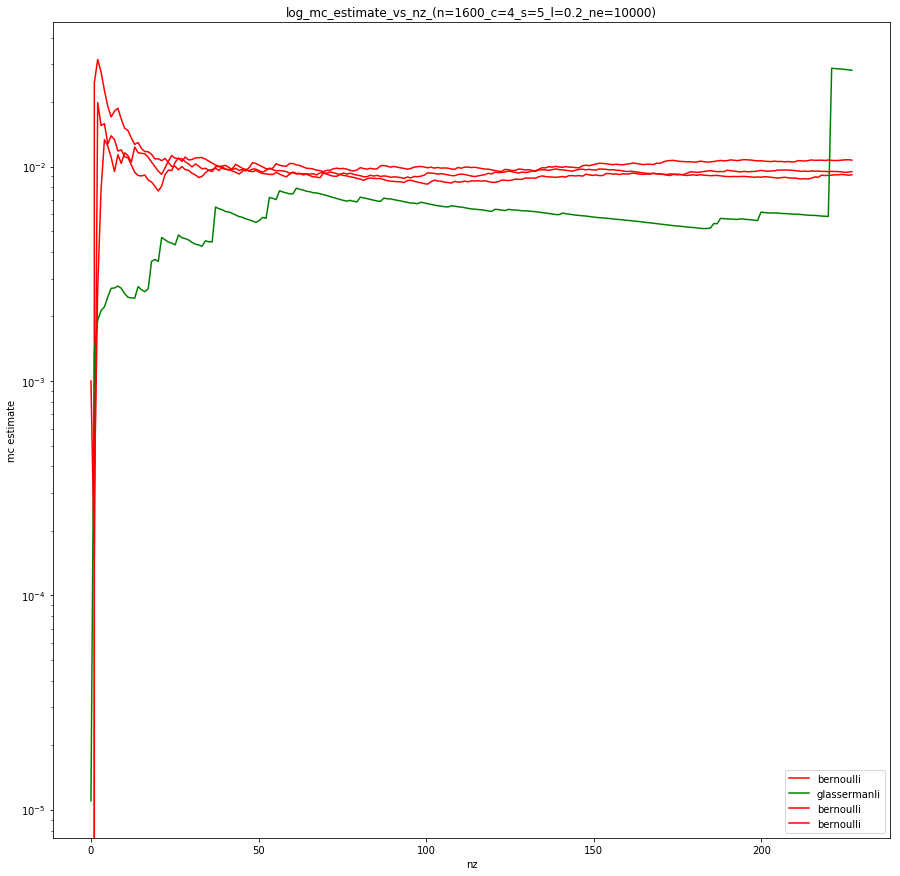

In [10]:
tail = 0.2
for n in [200, 400, 800, 1600]:
    for row in rows:
        if row['n'] == n:
            ys = np.array(row['df'])[range(0, len(row['df']), 1000)]
            xs = np.linspace(0, len(ys), len(ys))
            c = 'r' if row['algo'] == "bernoulli" else 'g'
            plt.plot(xs, ys, c=c, label=row['algo'])

    title = "log_mc_estimate_vs_nz_(n={}_c={}_s={}_l={}_ne={})".format(n, 4, 5, tail, 10000)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (15,15)
    plt.yscale('log')
    plt.ylabel("mc estimate")
    plt.xlabel("nz")
    plt.legend()
    plt.show()

In [ ]:

for tail in [0.1]:
    for row in rows:
        if row['l'] == tail:
            xs = np.linspace(0, len(row['df']), len(row['df']))
            ys = row['df']
            c = 'r' if row['algo'] == "bernoulli" else 'g'
            plt.plot(xs, ys, c=c, label=row['algo'])

    title = "log_mc_estimate_vs_nz_(n={}_c={}_s={}_l={}_ne={})".format(2500, 4, 5, tail, 10000)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (15,15)
    plt.yscale('log')
    plt.ylabel("mc estimate")
    plt.xlabel("nz")
    plt.legend()
    plt.savefig("{}.pdf".format(title))